In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns
import math
import os

In [49]:
PATH = "../data/SDL_vsync_1002_test"
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [50]:
file_data = []
diff_means = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}")
    # if (data_in.iloc[1]['fw'] > 500000 and data_in.iloc[1]['fw_running'] == True and data_in.iloc[1]['diff'] < 0):
    #     print(data_in.iloc[1]['framework'])
    #     data_in['fw'] = np.where(data_in['fw'] > 500000, data_in['fw'] - 500000, data_in['fw'])
    #     print(data_in.iloc[5]['fw'])
    mean = data_in.query("fw != -1 & diff > 0")['diff'].mean()
    if not math.isnan(mean):
        diff_means.append(mean)
    file_data.append(data_in)

In [51]:
data = pd.concat(file_data)
data

,Unnamed: 0,id,framework,complexity,framework_complexity,program,fw_running,program_fwrunning,ete,fw,diff
0,0,0,GLEW_SDL,default,GLEW_SDL_default,windup,False,windup_False,112,-1,113
1,1,1,GLEW_SDL,default,GLEW_SDL_default,windup,False,windup_False,112,-1,113
2,2,2,GLEW_SDL,default,GLEW_SDL_default,windup,False,windup_False,228,-1,229
3,3,3,GLEW_SDL,default,GLEW_SDL_default,windup,False,windup_False,116,-1,117
4,4,4,GLEW_SDL,default,GLEW_SDL_default,windup,False,windup_False,112,-1,113
...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,SDL2_Software_vsync,rects,SDL2_Software_vsync_rects,windup,True,windup_True,35740,26054,9686
196,196,196,SDL2_Software_vsync,rects,SDL2_Software_vsync_rects,windup,True,windup_True,36400,27458,8942
197,197,197,SDL2_Software_vsync,rects,SDL2_Software_vsync_rects,windup,True,windup_True,35980,26856,9124
198,198,198,SDL2_Software_vsync,rects,SDL2_Software_vsync_rects,windup,True,windup_True,38892,29071,9821


# E2E Latency

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\1407544793.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[0], data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black', size=1)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\1407544793.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[1], data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black', size=1)


Text(0.5, 1.0, 'rects')

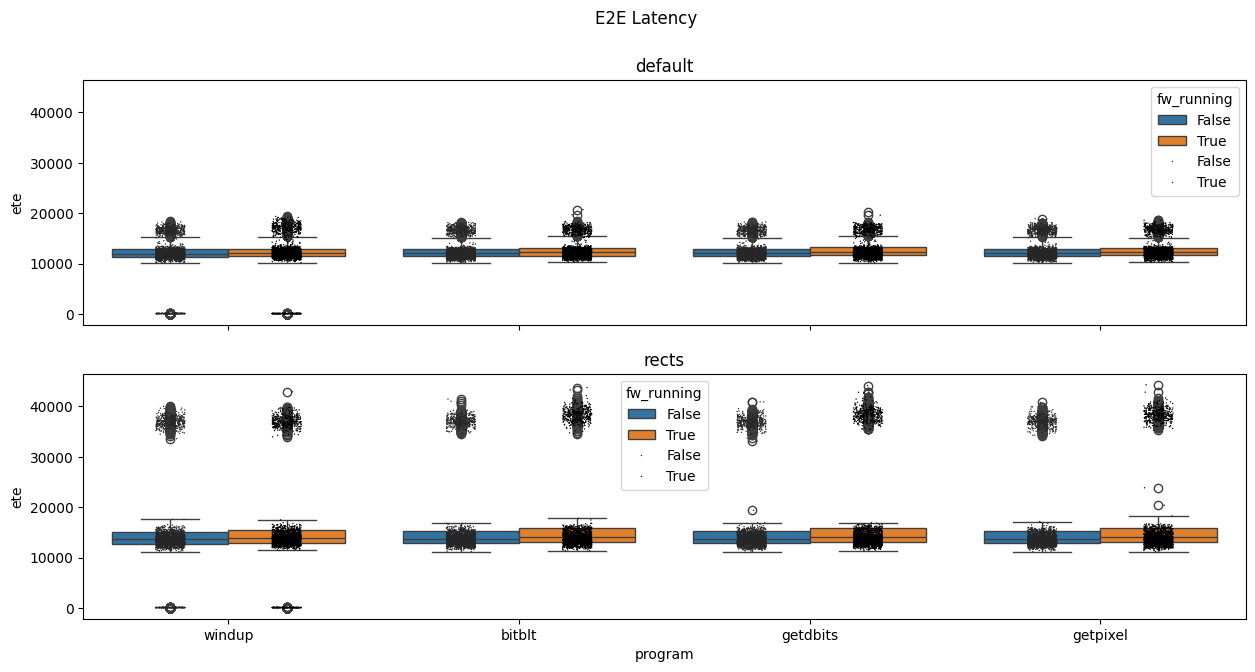

In [52]:
fig, axes = plt.subplots(2, 1, figsize=(15, 7), sharex=True, sharey=True)
fig.suptitle("E2E Latency")

sns.boxplot(ax=axes[0], data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running')
sns.stripplot(ax=axes[0], data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black', size=1)
axes[0].set_title("default")

sns.boxplot(ax=axes[1], data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running')
sns.stripplot(ax=axes[1], data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black', size=1)
axes[1].set_title("rects")

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\111000302.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[0], data=data[((data['complexity'] == 'default') & (data['framework'] == FRAMEWORK))], x='program', y='ete', hue='fw_running', dodge=True, color='black', size=1)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\111000302.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[1], data=data[((data['complexity'] == 'rects') & (data['framework'] == FRAMEWORK))], x='program', y='ete', hue='fw_running', dodge=True, color='black', size=1)


Text(0.5, 1.0, 'rects')

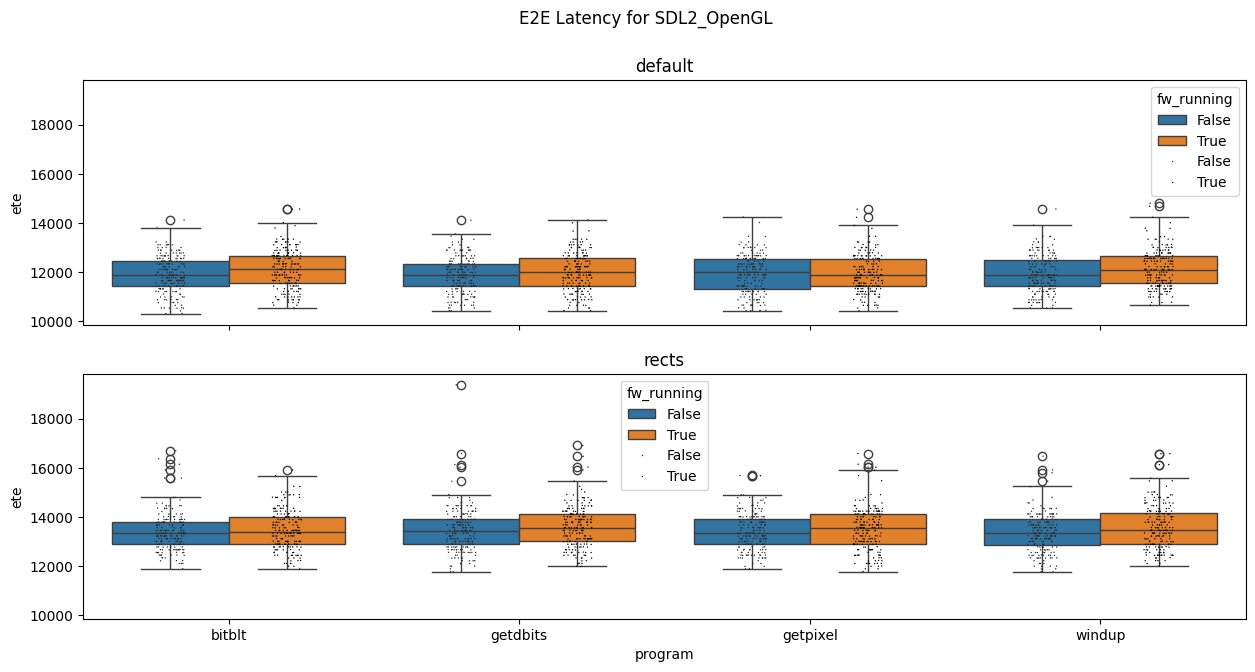

In [53]:
FRAMEWORK = 'SDL2_OpenGL'
fig, axes = plt.subplots(2, 1, figsize=(15, 7), sharex=True, sharey=True)
fig.suptitle(f"E2E Latency for {FRAMEWORK}")

sns.boxplot(ax=axes[0], data=data[((data['complexity'] == 'default') & (data['framework'] == FRAMEWORK))], x='program', y='ete', hue='fw_running')
sns.stripplot(ax=axes[0], data=data[((data['complexity'] == 'default') & (data['framework'] == FRAMEWORK))], x='program', y='ete', hue='fw_running', dodge=True, color='black', size=1)
axes[0].set_title("default")

sns.boxplot(ax=axes[1], data=data[((data['complexity'] == 'rects') & (data['framework'] == FRAMEWORK))], x='program', y='ete', hue='fw_running')
sns.stripplot(ax=axes[1], data=data[((data['complexity'] == 'rects') & (data['framework'] == FRAMEWORK))], x='program', y='ete', hue='fw_running', dodge=True, color='black', size=1)
axes[1].set_title("rects")

In [54]:
data_fw_running = data[data['fw_running'] == True]

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\3189530323.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='ete', hue='program', dodge=True, color='black', size=1)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\3189530323.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='ete', hue='program', dodge=True, color='black', size=1)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\3189530323.py:14: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same eff

[Text(0, 0, 'GLEW_SDL'),
 Text(1, 0, 'SDL2_Direct3D'),
 Text(2, 0, 'SDL2_Direct3D_vsync'),
 Text(3, 0, 'SDL2_OpenGLES2'),
 Text(4, 0, 'SDL2_OpenGLES2_vsync'),
 Text(5, 0, 'SDL2_OpenGLES'),
 Text(6, 0, 'SDL2_OpenGLES_vsync'),
 Text(7, 0, 'SDL2_OpenGL'),
 Text(8, 0, 'SDL2_OpenGL_vsync'),
 Text(9, 0, 'SDL2_Software'),
 Text(10, 0, 'SDL2_Software_vsync')]

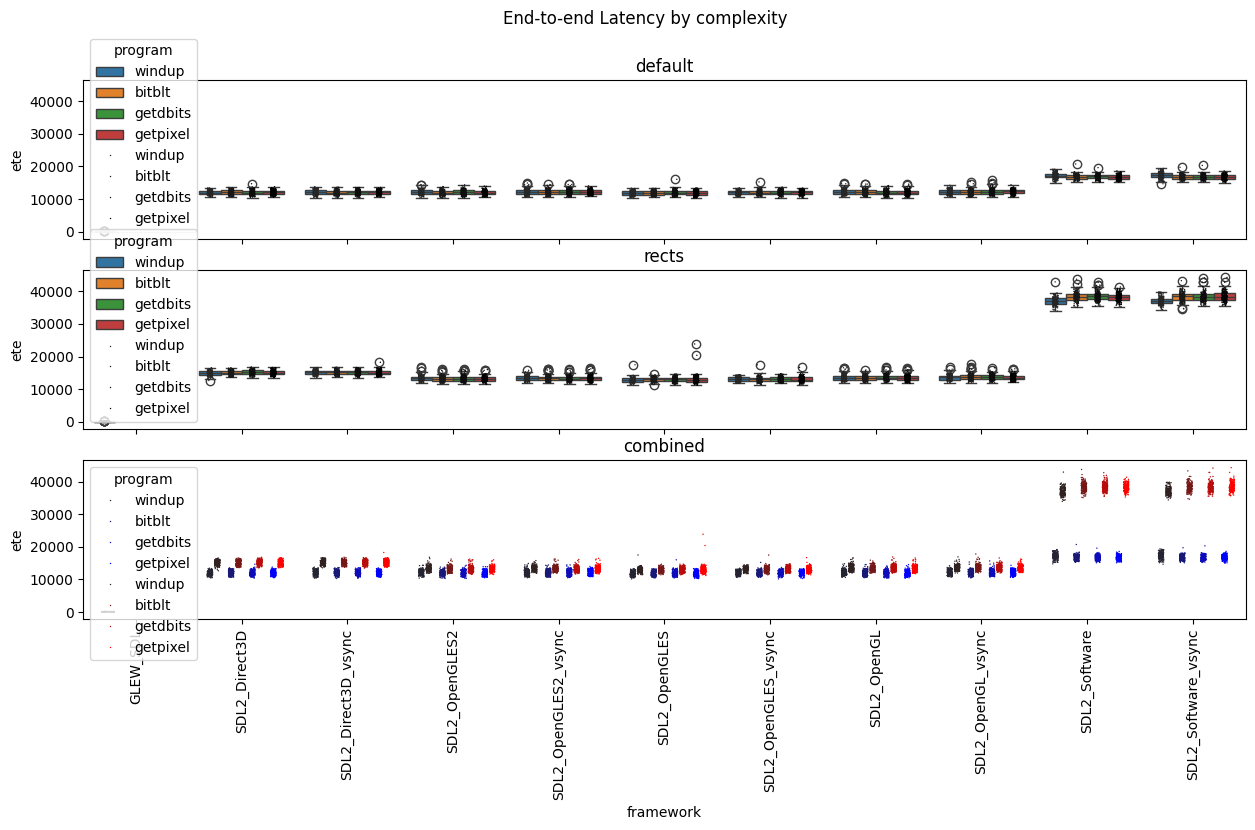

In [55]:
fig, axes = plt.subplots(3, 1, figsize=(15, 7), sharex=True, sharey=True)
fig.suptitle(f"End-to-end Latency by complexity")

sns.boxplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='ete', hue='program', dodge=True)
sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='ete', hue='program', dodge=True, color='black', size=1)
axes[0].set_title("default")

sns.boxplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='ete', hue='program', dodge=True)
sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='ete', hue='program', dodge=True, color='black', size=1)
axes[1].set_title("rects")

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='ete', hue='program', dodge=True, color='blue', size=1)
sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='ete', hue='program', dodge=True, color='red', transform=offset(0.05)+trans, size=1)
axes[2].set_title("combined")

axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

# Framework Latency

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\3389389689.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='fw', hue='program', dodge=True, color='black', size=1)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\3389389689.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='fw', hue='program', dodge=True, color='black', size=1)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\3389389689.py:14: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effec

[Text(0, 0, 'GLEW_SDL'),
 Text(1, 0, 'SDL2_Direct3D'),
 Text(2, 0, 'SDL2_Direct3D_vsync'),
 Text(3, 0, 'SDL2_OpenGLES2'),
 Text(4, 0, 'SDL2_OpenGLES2_vsync'),
 Text(5, 0, 'SDL2_OpenGLES'),
 Text(6, 0, 'SDL2_OpenGLES_vsync'),
 Text(7, 0, 'SDL2_OpenGL'),
 Text(8, 0, 'SDL2_OpenGL_vsync'),
 Text(9, 0, 'SDL2_Software'),
 Text(10, 0, 'SDL2_Software_vsync')]

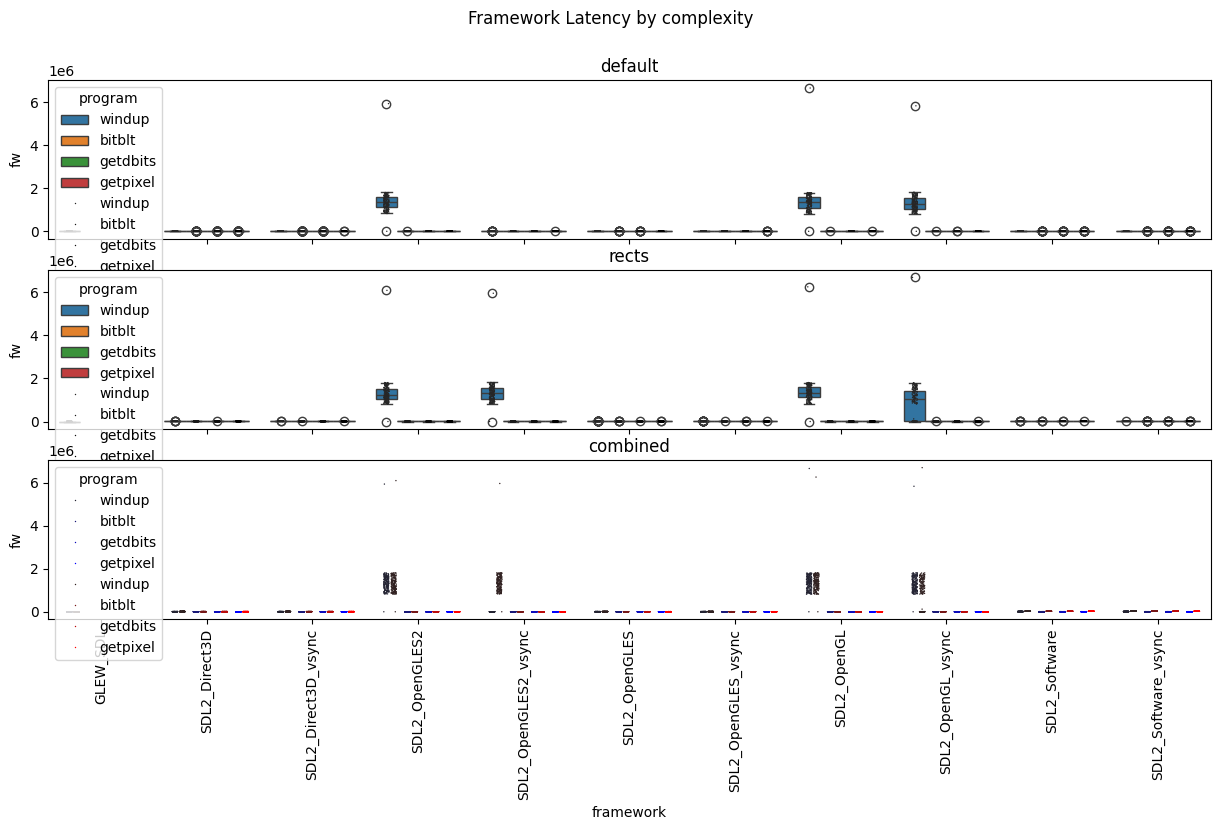

In [56]:
fig, axes = plt.subplots(3, 1, figsize=(15, 7), sharex=True, sharey=True)
fig.suptitle(f"Framework Latency by complexity")

sns.boxplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='fw', hue='program', dodge=True)
sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='fw', hue='program', dodge=True, color='black', size=1)
axes[0].set_title("default")

sns.boxplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='fw', hue='program', dodge=True)
sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='fw', hue='program', dodge=True, color='black', size=1)
axes[1].set_title("rects")

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='fw', hue='program', dodge=True, color='blue', size=1)
sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='fw', hue='program', dodge=True, color='red', transform=offset(0.05)+trans, size=1)
axes[2].set_title("combined")

axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)


In [57]:
# FRAMEWORK = 'SDL2_OPENGL'
# fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
# fig.suptitle(f"Framework Latency for {FRAMEWORK}")

# sns.boxplot(ax=axes[0], data=data_fw_running[((data_fw_running['complexity'] == 'default') & (data_fw_running['framework'] == FRAMEWORK))], x='framework', y='fw', hue='program', dodge=True)
# sns.stripplot(ax=axes[0], data=data_fw_running[((data_fw_running['complexity'] == 'default') & (data_fw_running['framework'] == FRAMEWORK))], x='framework', y='fw', hue='program', dodge=True, color='black')
# axes[0].set_title("default")

# sns.boxplot(ax=axes[1], data=data_fw_running[((data_fw_running['complexity'] == 'rects') & (data_fw_running['framework'] == FRAMEWORK))], x='framework', y='fw', hue='program', dodge=True)
# sns.stripplot(ax=axes[1], data=data_fw_running[((data_fw_running['complexity'] == 'rects') & (data_fw_running['framework'] == FRAMEWORK))], x='framework', y='fw', hue='program', dodge=True, color='black')
# axes[1].set_title("rects")

# Difference

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\1957090441.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='diff', hue='program', dodge=True, color='black', size=1)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\1957090441.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', dodge=True, color='black', size=1)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\1957090441.py:14: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same e

10055.1


C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\1957090441.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)


(-5000.0, 25000.0)

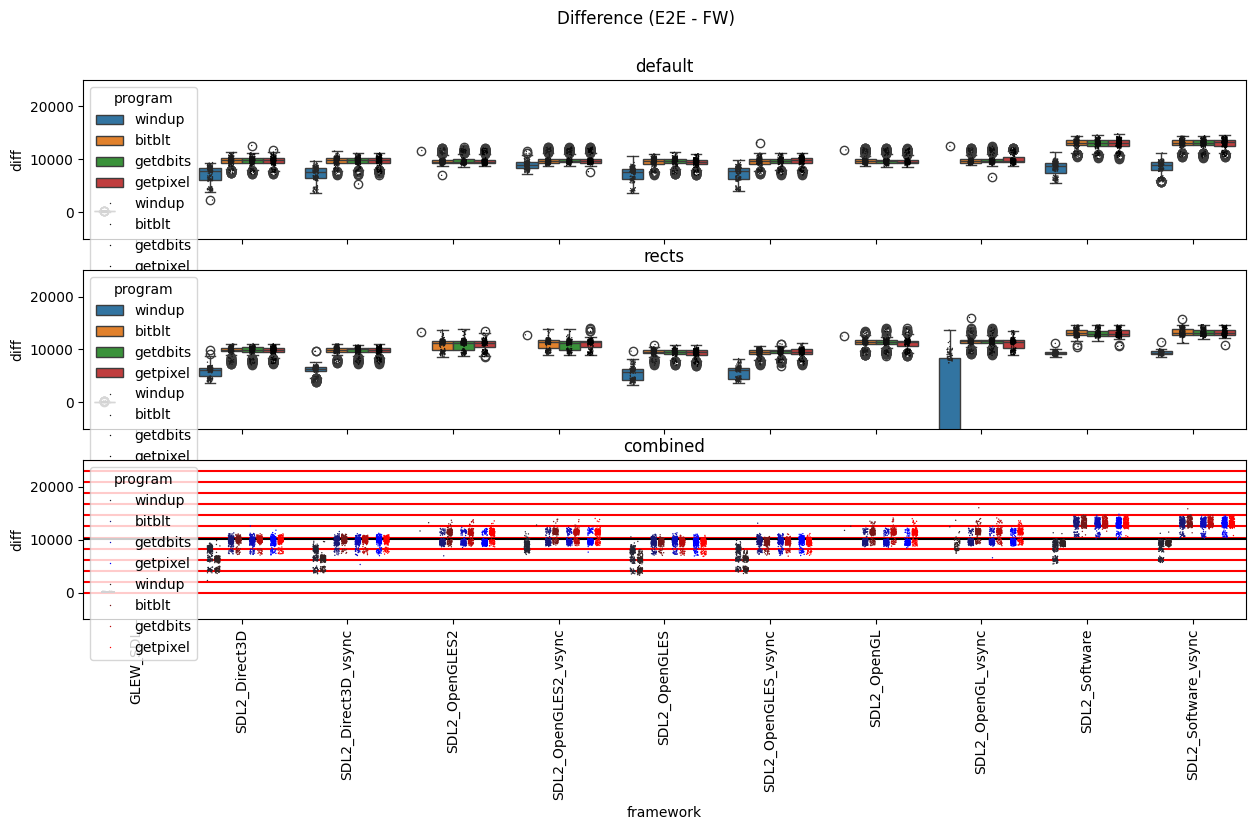

In [58]:
fig, axes = plt.subplots(3, 1, figsize=(15, 7), sharex=True, sharey=True)
fig.suptitle("Difference (E2E - FW)")

sns.boxplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='diff', hue='program', dodge=True)
sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='diff', hue='program', dodge=True, color='black', size=1)
axes[0].set_title("default")

sns.boxplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', dodge=True)
sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', dodge=True, color='black', size=1)
axes[1].set_title("rects")

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'default'], x='framework', y='diff', hue='program', dodge=True, color='blue', size=1)
sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', dodge=True, color='red', transform=offset(0.05)+trans, size=1)
axes[2].set_title("combined")


for i in range(0, 20):
    plt.axhline(i*(1/480)*1000*1000, color='red')

agg_mean = round(np.mean(diff_means), 1)
plt.axhline(agg_mean, color='black')
print(agg_mean)

axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
axes[2].set_ylim(-5000, 25000)

# Combined

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\3328590454.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='ete', hue='program', dodge=True, color='black')
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\3328590454.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='fw', hue='program', dodge=True, color='black')
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_29912\3328590454.py:14: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the s

Text(0.5, 1.0, 'diff')

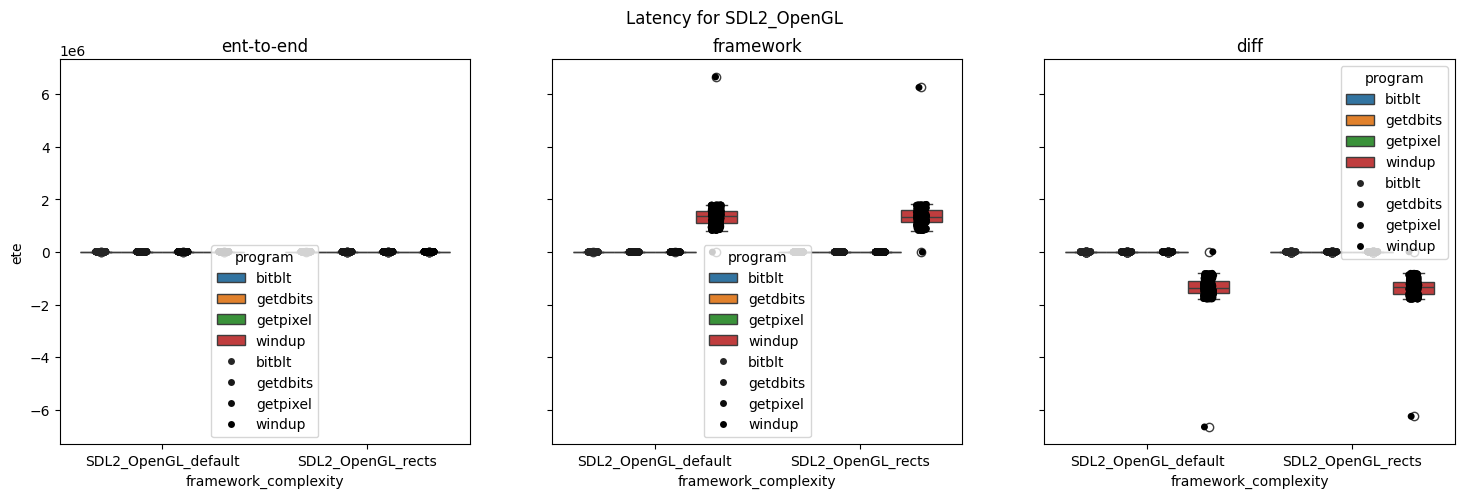

In [61]:
FRAMEWORK = 'SDL2_OpenGL'
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
fig.suptitle(f"Latency for {FRAMEWORK}")

sns.boxplot(ax=axes[0], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='ete', hue='program', dodge=True)
sns.stripplot(ax=axes[0], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='ete', hue='program', dodge=True, color='black')
axes[0].set_title("ent-to-end")

sns.boxplot(ax=axes[1], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='fw', hue='program', dodge=True)
sns.stripplot(ax=axes[1], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='fw', hue='program', dodge=True, color='black')
axes[1].set_title("framework")

sns.boxplot(ax=axes[2], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='diff', hue='program', dodge=True)
sns.stripplot(ax=axes[2], data=data_fw_running[data_fw_running['framework'] == FRAMEWORK], x='framework_complexity', y='diff', hue='program', dodge=True, color='black')
axes[2].set_title("diff")

#axes[2].set_ylim(0, 25000)